# DATA 620 Project 1 - Stack Overflow Tag Network

#### Team members: Mia Chen, Wei Zhou
#### Date: 6/21/2020

## Task
For your first project, you are asked to
1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

## Overview
We're going to work with the Stack Overflow Tag Network [dataset](https://www.kaggle.com/stackoverflow/stack-overflow-tag-network) from Kaggle. It contains a network of technology tags from Developer Stories on the Stack Overflow online developer community website. From comparing degree centrality across categorical groups, we can likely to predict which group of technology is more popular. The dataset contains:

* <i><b>stack_network_links:</i></b> contains links of the network, the source and target tech tags plus the values of the link between each pair

* <i><b>stack_network_nodes:</i></b> contains nodes of the network, the name of each node, which group that node belongs to (calculated via a cluster walktrap), and a node size based on how often that technology tag is used


In [12]:
# Load modules
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load datasets
nodes = pd.read_csv('stack_network_nodes.csv')
edges = pd.read_csv('stack_network_links.csv')

print(nodes.head())

        name  group  nodesize
0       html      6    272.45
1        css      6    341.17
2  hibernate      8     29.83
3     spring      8     52.84
4       ruby      3     70.14


In [4]:
print(edges.head())

             source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925


## Metadata

The nodes are the tags that appear in a developer's profile in Stack Overflow "Developer Stories". If two tags appear on the same profile there's a tag between them. Thus, we will construct an undirectional graph.

Nodes and edges have metadata associated with them:

#### Node metadata:
* `name`: nodes
* `group`: which group that node belongs to (calculated via a cluster walktrap)
* `nodesize`: proportional to how many developers have that tag in their developer story profile

#### Edge metadata:
* `source`: nodes of edges
* `target`: nodes on the other side of the edges
* `value`: proportional to how correlated those two tags are (correlation coefficient * 100)

In [5]:
# Construct the graph
G = nx.Graph() # define an empty graph G

# Add nodes to the graph by iterating over the rows
for index, row in nodes.iterrows():
    G.add_node(row['name'], group = row['group'], nodesize = row['nodesize'])

In [6]:
# Add edges to the graph by iterating over the rows
for index, row in edges.iterrows():
    G.add_edge(row['source'], row['target'], weight = row['value'])

In [7]:
# Check the number of nodes and edges
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


115 nodes and 245 edges mean there are 115 unique tags which are connected among themselves with 245 edges. Degree of a node in an undirected graph shows the number of nodes it's connected to. Average degree is the average of all node's degree. Stack Overflow tags have an average degree of 4.26 which indicates that on average tags are connected to four other tags. 

## Degree Distribution
Below we can see most tags have only 1 or 2 neighbors while some tags are linked to more than 10 tags.

(array([46., 14., 22.,  7., 12.,  4.,  4.,  1.,  4.,  1.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

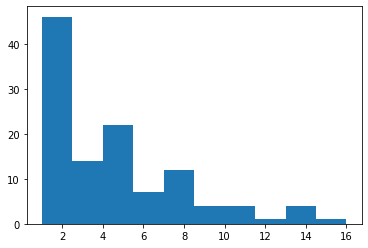

In [8]:
# Plot histogram to view degree distribution among nodes
plt.hist([node[1] for node in list(G.degree())])

## Distribution Among Groups
Group 6 and Group 1 have the highest number of nodes falling into them.

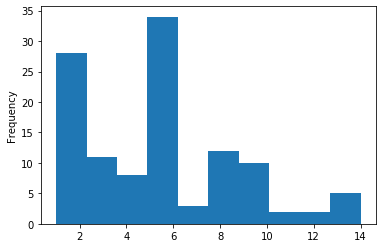

In [9]:
nodes['group'].plot(kind = 'hist')

## Node Size Distribution
Most nodes have size less than 70.

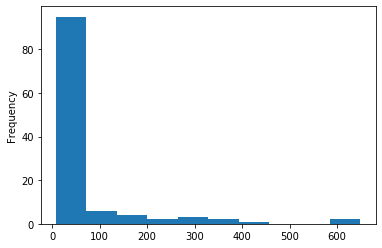

In [10]:
nodes['nodesize'].plot(kind = 'hist')

## Centrality Measures

Centrality measures helps us to identify the most important nodes or vertices in a graph. 

* <b>Degree Centrality:</b> Degree centrality of a node is the ratio of the number of neighbors over the number of all possible neighbors. The greater the degree centrality the node can be more powerful.

* <b>Eigenvector Centrality:</b> A measure of the influence a node has on a network. If a node is pointed to by many nodes then that node will have high eigenvector centrality.

In [30]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)

# Top 10 nodes with the highest degree centrality
top_10_nodes_dc = sorted(degree_centrality.items(), 
                         key=lambda x:x[1], reverse=True)[0:10]

print(top_10_nodes_dc)

[('jquery', 0.14035087719298245), ('css', 0.12280701754385964), ('c#', 0.12280701754385964), ('asp.net', 0.11403508771929824), ('angularjs', 0.11403508771929824), ('javascript', 0.10526315789473684), ('mysql', 0.09649122807017543), ('html5', 0.08771929824561403), ('php', 0.08771929824561403), ('linux', 0.08771929824561403)]


In [22]:
eigenvector_centrality = nx.eigenvector_centrality(G)

top_10_nodes_ec = sorted(eigenvector_centrality.items(), 
                         key=lambda x:x[1], reverse=True)[0:10]

print(top_10_nodes_ec)

[('jquery', 0.3657638453622554), ('css', 0.338701180241117), ('javascript', 0.32563098638889276), ('html5', 0.2681052746250041), ('php', 0.26530101525817973), ('angularjs', 0.2652026528173442), ('sass', 0.2520957761852705), ('mysql', 0.239342658253863), ('twitter-bootstrap', 0.20709455337131874), ('html', 0.2038246927757326)]


In [62]:
nodes['name'][nodes['group']==6]

0                     html
1                      css
8                    html5
14              javascript
15                  jquery
18                     php
19                   mysql
24                    less
25                    sass
44                    ajax
51               angularjs
53                 laravel
56                    json
57                     xml
59               wordpress
67             codeigniter
70       twitter-bootstrap
86         ionic-framework
88                  vue.js
100                 drupal
102              bootstrap
108    twitter-bootstrap-3
112              photoshop
Name: name, dtype: object

## Visualization
Most of the nodes with the highest centrality are from Group 6 (the group in purple below). The network graph reference can be found [here](https://www.kaggle.com/jncharon/python-network-graph).

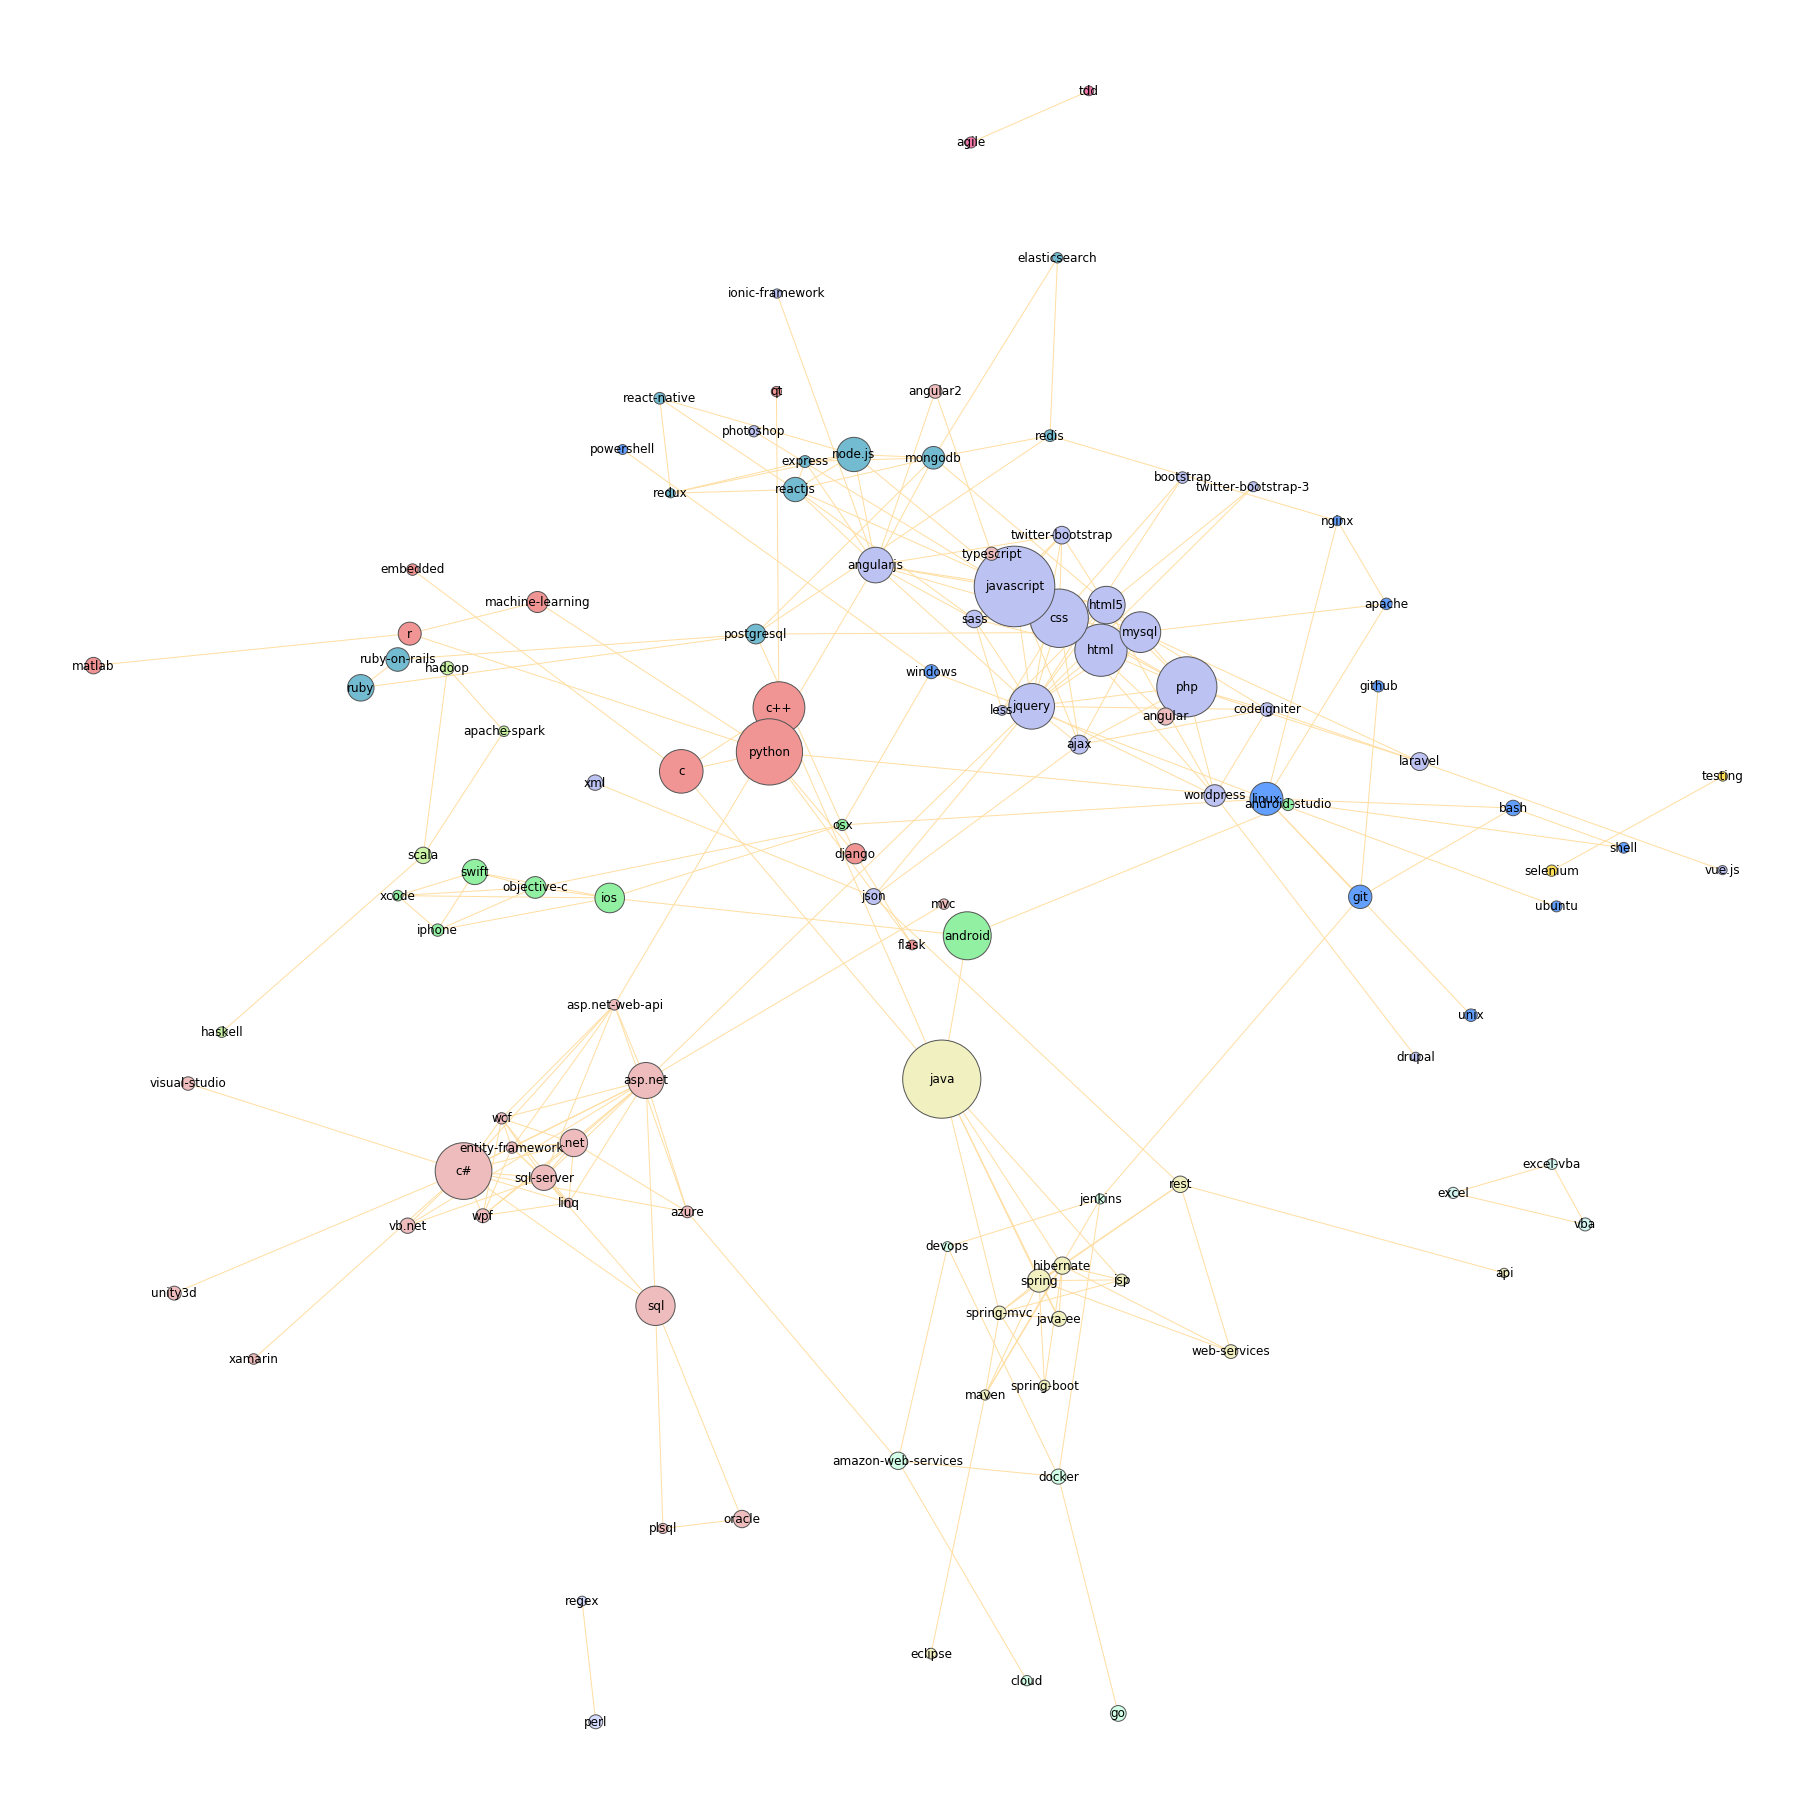

In [60]:
# Network graph
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.4, iterations=20), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()